# Implementing Latent Heat Curves in DVM-DOS-TEM
This notebook is intented to be a scratch workspace for integrating latent heat of fusion / melting along a curve. Currently, dvm-dos-tem exchanges latent heat all at once when freezing/melting soil water when soil temperature crosses 0 deg. C. This does not account for soil water remaining in the pore space at temperatures below zero, therefore misrepresenting the thermal state during periods of phase change. To account for unfrozen water at soil temperatures below zero, we would like to represent latent heat exhange along a curve depending on soil temperature.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [3]:
#Hinzman et al., 1998 equation
def hinzman(T, Tf=-2, Ti = 0, p=1, L=10000):
    #L: total latent heat released during freezing (J/m3)
    #T: soil temperature in deg C
    #Tf: soil temperature when freezing is complete
    #Ti: soil temperature when freezing is initiated
    #p: adjustable constant see Farouki, 1981
    
    #This function results in a latent heat content that varies from 100% to 0% 
    #exponentially as the soil temperature drops from Ti to Tf
    
    dT = Tf - Ti
    
    LHC = L * ( (np.exp(-(p*T / dT)) - np.exp(-(p*Tf / dT))) / (np.exp(-(p*Ti / dT)) - np.exp(-(p*Tf / dT))) )
    return LHC # Latent heat content of soil at temperature T (J/m3)

In [4]:
temps = np.linspace(-2,0,50)
p_vals = [1,2,3,4,5,6,7,8,9,10]
L=10000

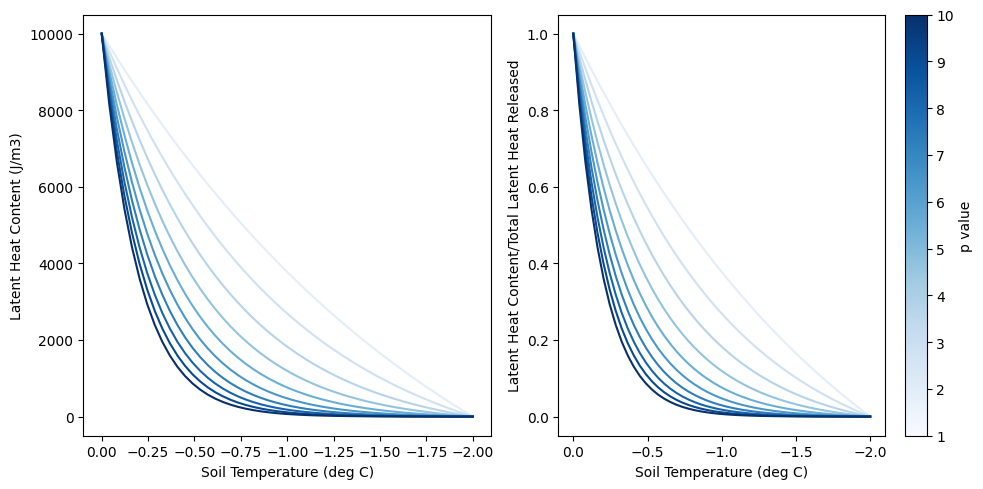

In [5]:
cmap = matplotlib.cm.get_cmap('Blues')
fig, axes=plt.subplots(1,2, figsize = (10,5))
for c, p_val in enumerate(p_vals):

    axes[0].plot(temps, hinzman(T=temps, p=p_val, L=L), color = cmap(p_val/10))
    axes[1].plot(temps, hinzman(T=temps, p=p_val, L=L)/L, color = cmap(p_val/10))
    
plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1, vmax=10), cmap=cmap), label = 'p value', ax=axes[1])
axes[0].set_xlabel('Soil Temperature (deg C)')
axes[0].set_ylabel('Latent Heat Content (J/m3)')

axes[1].set_xlabel('Soil Temperature (deg C)')
axes[1].set_ylabel('Latent Heat Content/Total Latent Heat Released')
axes[0].invert_xaxis()
axes[1].invert_xaxis()
fig.tight_layout()